# Scaling Benchmark for SOMA

The benchmark runs over 1 to 8 nodes with 4 tasks per node. We plot the total runtime and the average TPS for the application. 

In [6]:
import pandas
import os
import matplotlib.pyplot
import numpy
import csv

# Only Draw Static Images in the Notebook
%matplotlib inline

In [7]:
# Base Path for the Benchmark Data
data_file="../data/current.data"
baseline_file="../data/baseline.data"

# Common Plotting Code

In [13]:
plot_data = {}
plot_data["x-axis"]  = []
plot_data["y-axis"]  = []

with open(data_file, 'r') as DataFile:
    reader = csv.DictReader(DataFile)
    for index, line in enumerate(reader):
        plot_data["x-axis"].append(int(line["nodes"]))
        plot_data["y-axis"].append(float(line["tps"]))

In [14]:
baseline_data = {}
baseline_data["x-axis"]  = []
baseline_data["y-axis"]  = []

with open(baseline_file, 'r') as DataFile:
    reader = csv.DictReader(DataFile)
    for index, line in enumerate(reader):
        baseline_data["x-axis"].append(int(line["nodes"]))
        baseline_data["y-axis"].append(float(line["tps"]))

In [15]:
def scaling_plot(machine_name, plot_data):
    plot = matplotlib.pyplot.figure()
    ax = plot.subplots()
    ax.set_title("Scaling Plot on " + machine_name + " (Higher is Better)")
    ax.set_xlabel("Number of Nodes (log-scale)")
    ax.set_ylabel("TPS (log-scale)")
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    
    base = min(plot_data["y-axis"])
    control_data = [base * nodes for nodes in plot_data["x-axis"]]
    
    ax.plot(baseline_data["x-axis"],control_data, '--', color="0.8", label="Perfect Scaling")
    ax.plot(plot_data["x-axis"],plot_data["y-axis"], '.--',markersize=14, label="Current")
    ax.plot(baseline_data["x-axis"],plot_data["y-axis"], '.--',markersize=14, label="Baseline")
        
        
    #plot.legend() 
    ax.margins(0.1)
    
    y_ticklabels=[16, 32, 64,128,256,512]
    ax.set_yticks(y_ticklabels)
    ax.set_yticklabels(y_ticklabels)
    x_ticklabels=plot_data["x-axis"]
    ax.set_xticks(x_ticklabels)
    ax.set_xticklabels(x_ticklabels)
    
    plot.legend(bbox_to_anchor=(1.2, 0.9), title="Timesteps Per Second (TPS)")
    plot.savefig('../current.pdf', bbox_inches='tight')
    plot.savefig('../current.png', bbox_inches='tight')
    #plot.bbox([[0,10],[0, 15]])

## Benchmark Results on Juwels

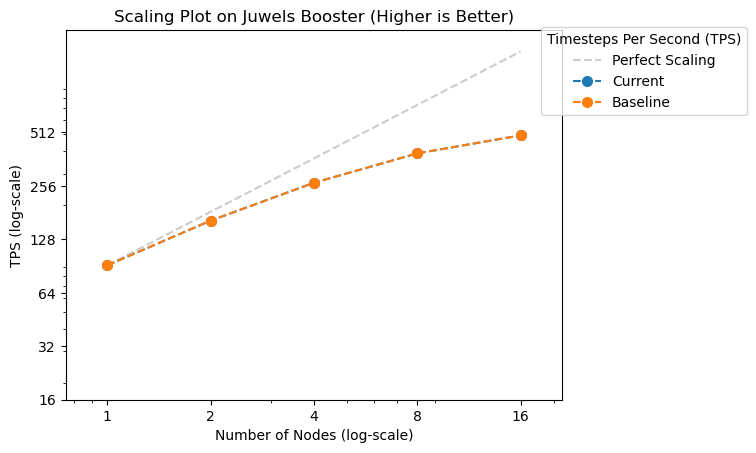

In [16]:
scaling_plot("Juwels Booster", plot_data)